In [1]:
from ABM_Final_Final_Final import SocialNetwork
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as nx_comm


In [16]:
n_agents = 75
prob = 0.5
w_pop = 0.15
w_prox = 0.75
w_sim = 0.1
sociability = 0.1
#w_pop = 0.20,w_prox = 0.65,w_sim = 0.15 not good


model = SocialNetwork(n_agents, prob, w_pop, w_prox, w_sim, sociability)

In [17]:
count = 1
max_steps = 500

    
for i in range(max_steps):
    # Run the model with the current set of parameters
    #print(model.Data_Collector["IN degree"])
    model.step()
    #communities = nx_comm.greedy_modularity_communities(model.G)

    print(f"\rProgress: {(i / max_steps) * 100:.2f}%", end='', flush=True)

    count += 1
    


Progress: 99.80%

0.23416757966927898
0.006856314087733851


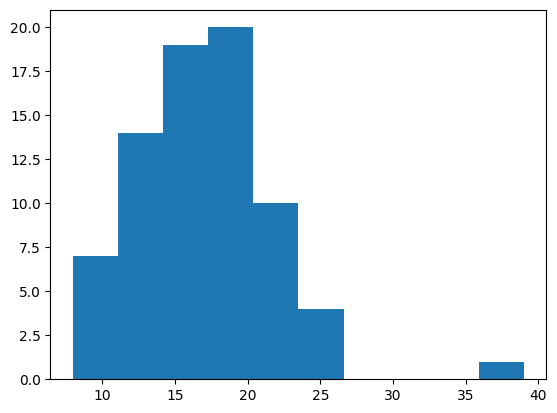

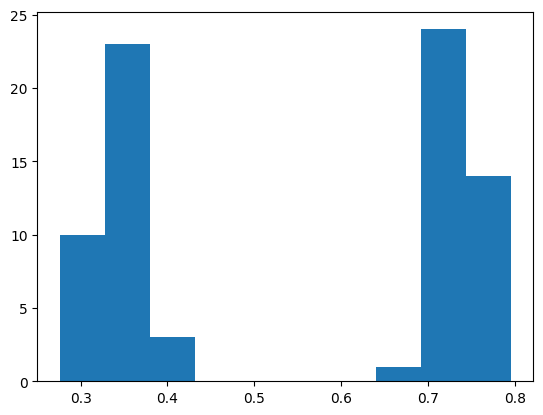

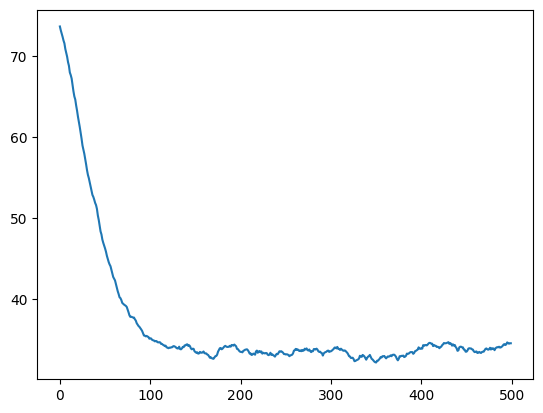

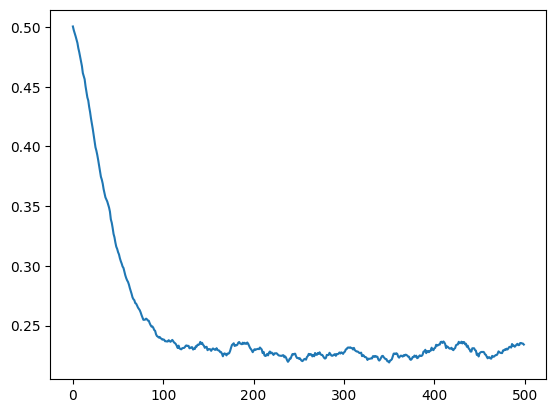

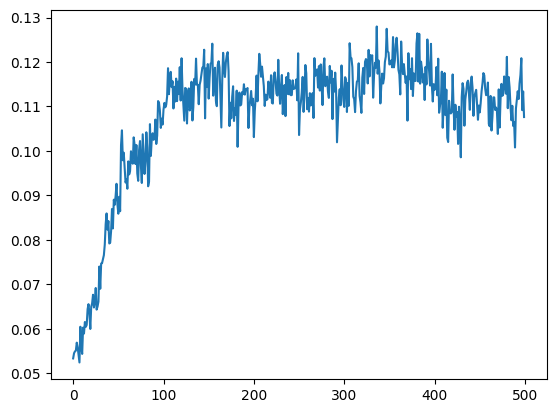

0      0.053311
1      0.054480
2      0.054890
3      0.055057
4      0.056856
         ...   
495    0.117090
496    0.120868
497    0.109172
498    0.113392
499    0.107626
Name: modularity, Length: 500, dtype: float64


<Figure size 1000x800 with 0 Axes>

In [19]:
avg_clustering_coeff = nx.average_clustering(model.G)
print(avg_clustering_coeff)
#print(model.WEIGHT)
results = pd.DataFrame(model.Data_Collector)
for node in model.G.nodes():
    for i in model.WEIGHT[node]:
        model.G[node][i]['weight'] = model.WEIGHT[node][i]

avg_clustering_coeff = nx.average_clustering(model.G, weight='weight')

degree_seq = results["IN degree"].iloc[-1]

print(avg_clustering_coeff)
                    
plt.figure()
plt.hist(degree_seq)
plt.show()
plt.figure()
plt.hist(list(model.OPINIONS.values()))
plt.show()
plt.figure()
plt.plot(results["avg degrees"])
plt.show()
plt.figure()
plt.plot(results["avg clustering coeff"])
plt.show()
plt.figure()
plt.plot(results["modularity"])
plt.show()

# Draw the graph
plt.figure(figsize=(10, 8))


# Perform community detection using the greedy modularity method
communities = nx_comm.greedy_modularity_communities(model.G)

# Convert the set of communities into a format suitable for modularity calculation
#partition = {node: i for i, community in enumerate(communities) for node in community}

# Calculate modularity
modularity = nx_comm.modularity(model.G, communities)
print(results["modularity"])

/Users/noaroebersen/.local/share/virtualenvs/ABM_Notebooks_0_1-qmu33wC9/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


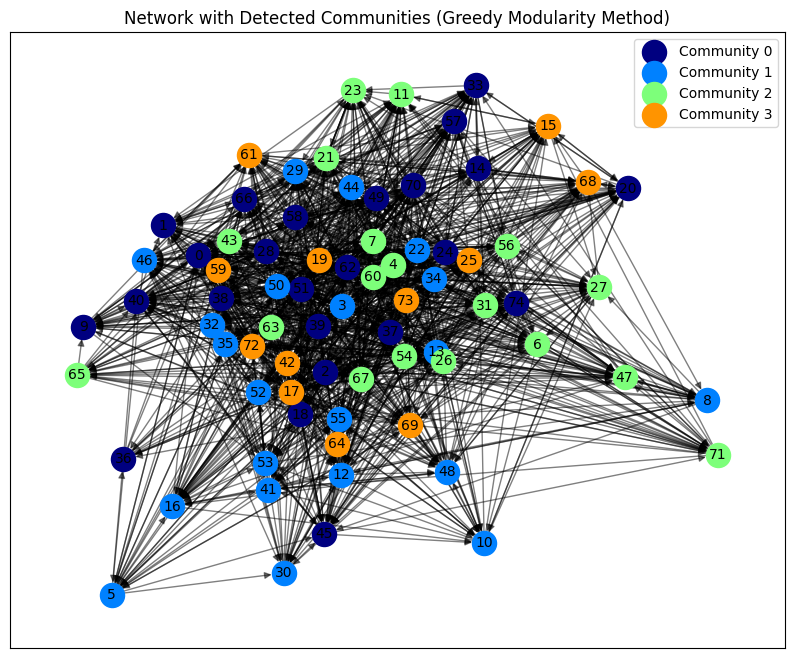

In [11]:
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt


# Perform community detection using the greedy modularity method
communities = nx_comm.greedy_modularity_communities(model.G)

# Convert communities to a partition dictionary
partition = {node: cid for cid, community in enumerate(communities) for node in community}

# Create a color map for visualizing communities
num_communities = len(communities)
colors = [plt.cm.jet(i / num_communities) for i in range(num_communities)]

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(model.G)  # Position nodes using the Fruchterman-Reingold force-directed algorithm

# Draw nodes with colors corresponding to their community
for community_id, color in enumerate(colors):
    nodes = [node for node, cid in partition.items() if cid == community_id]
    nx.draw_networkx_nodes(model.G, pos, nodes, node_size=300, node_color=[color], label=f'Community {community_id}')

# Draw edges
nx.draw_networkx_edges(model.G, pos, alpha=0.5)

# Draw labels
nx.draw_networkx_labels(model.G, pos, font_size=10)

# Add legend
plt.legend()
plt.title("Network with Detected Communities (Greedy Modularity Method)")
plt.show()

In [13]:
n_agents = 75
prob = 0.5
w_pop = 0.25
w_prox = 0.7
w_sim = 0.05
sociability = 0.05

model = SocialNetwork(n_agents, prob, w_pop, w_prox, w_sim, sociability)
count = 1
max_steps = 500

for i in range(max_steps):
    # Run the model with the current set of parameters
    #print(model.Data_Collector["IN degree"])

    model.step()
    print(f"\rProgress: {(i / max_steps) * 100:.2f}%", end='', flush=True)

    count += 1
    
results = pd.DataFrame(model.Data_Collector)

Progress: 99.80%

0.006131785155956731


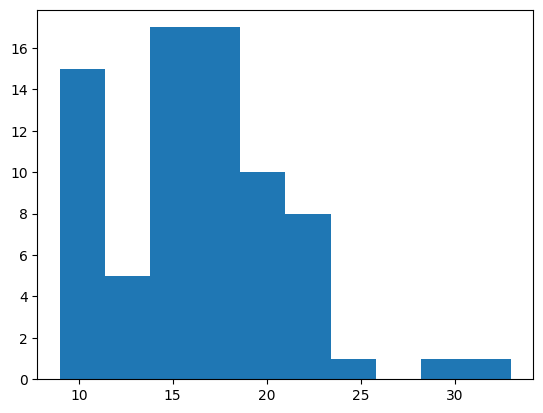

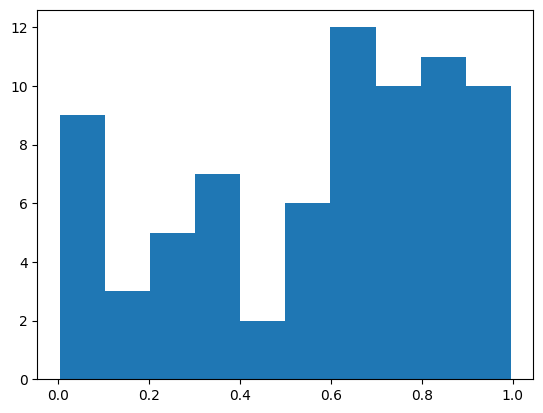

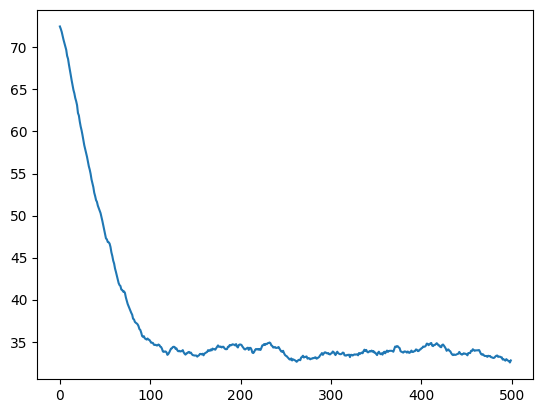

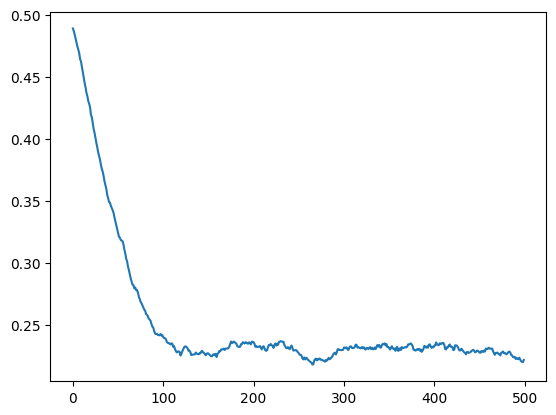

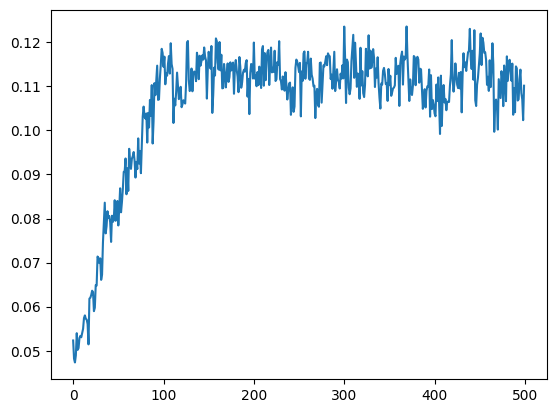

0.11014663929276282


<Figure size 1000x800 with 0 Axes>

In [14]:

degree_seq = results["IN degree"].iloc[-1]

print(avg_clustering_coeff)
                    
plt.figure()
plt.hist(degree_seq)
plt.show()
plt.figure()
plt.hist(list(model.OPINIONS.values()))
plt.show()
plt.figure()
plt.plot(results["avg degrees"])
plt.show()
plt.figure()
plt.plot(results["avg clustering coeff"])
plt.show()
plt.figure()
plt.plot(results["modularity"])
plt.show()

# Draw the graph
plt.figure(figsize=(10, 8))


# Perform community detection using the greedy modularity method
communities = nx_comm.greedy_modularity_communities(model.G)

# Convert the set of communities into a format suitable for modularity calculation
#partition = {node: i for i, community in enumerate(communities) for node in community}

# Calculate modularity
modularity = nx_comm.modularity(model.G, communities)
print(modularity)

0.1 0 0 1
Progress: 99.80%

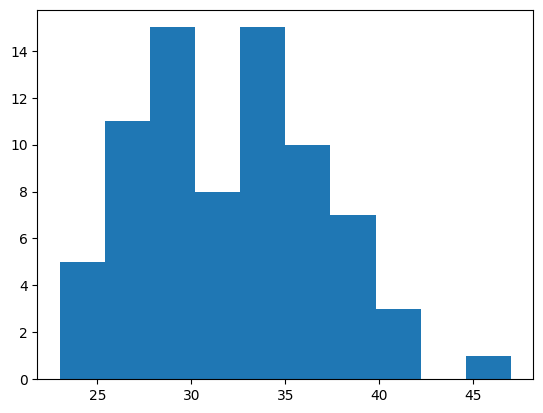

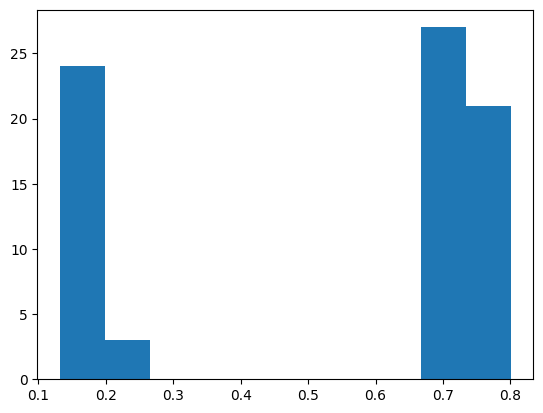

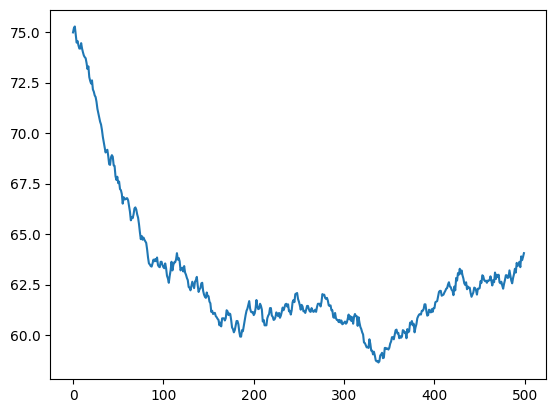

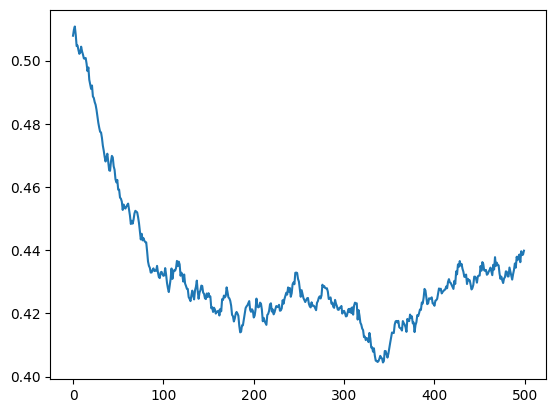

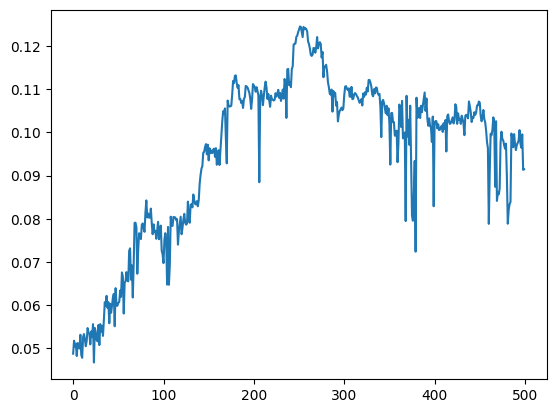

0.1 0 0.25 0.75
Progress: 99.80%

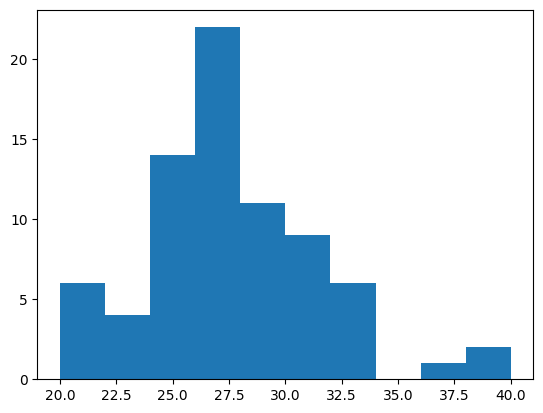

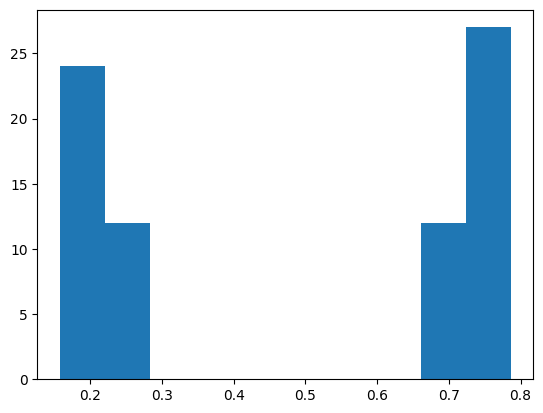

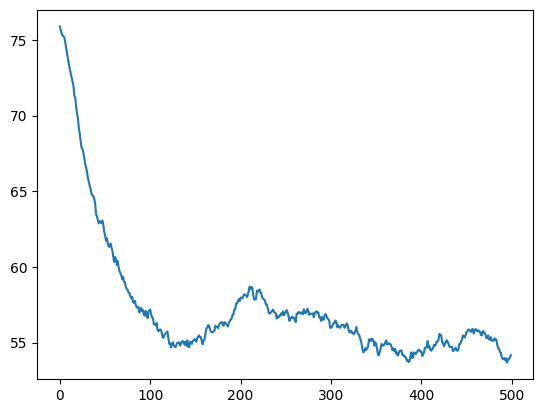

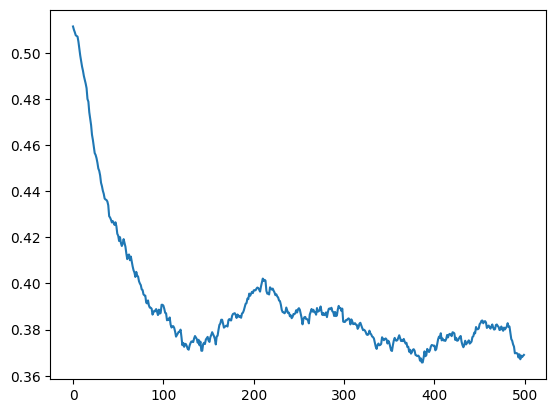

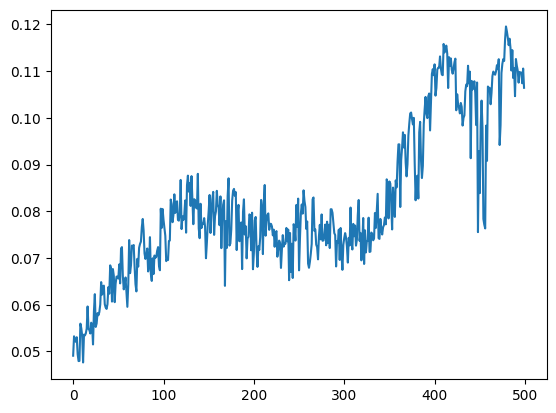

0.1 0 0.5 0.5
Progress: 99.80%

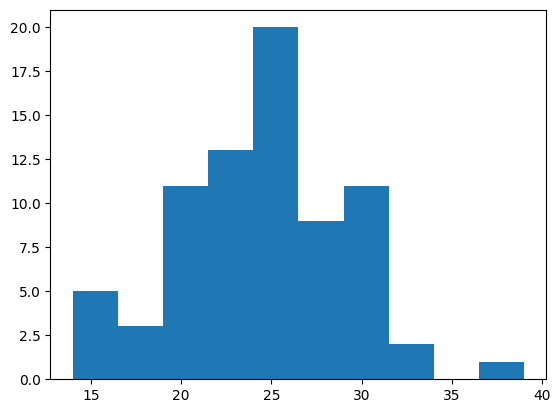

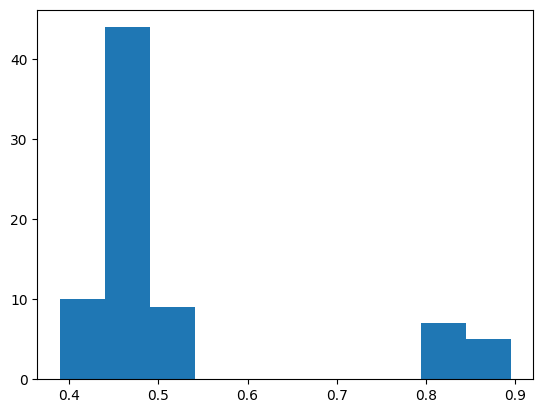

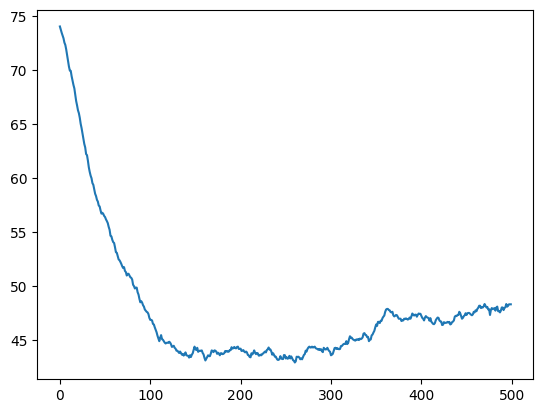

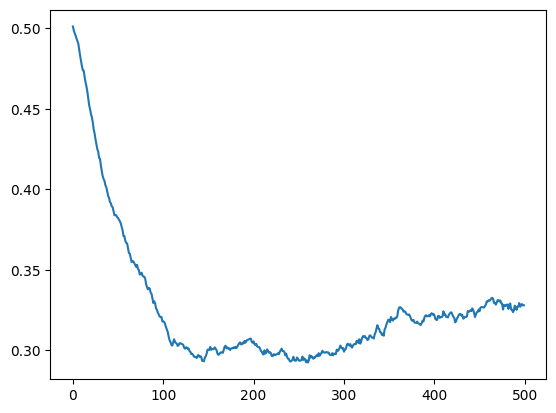

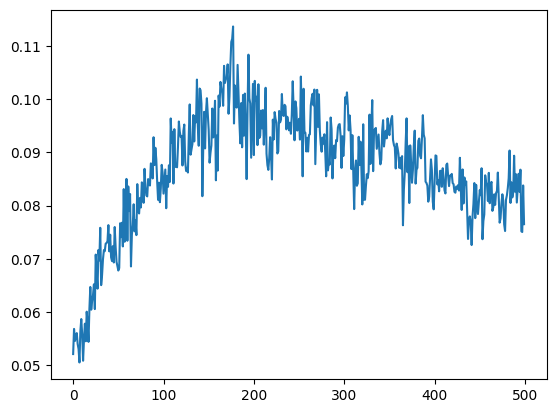

0.1 0 0.75 0.25
Progress: 99.80%

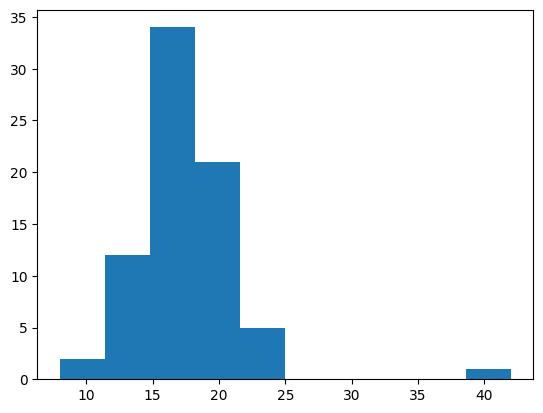

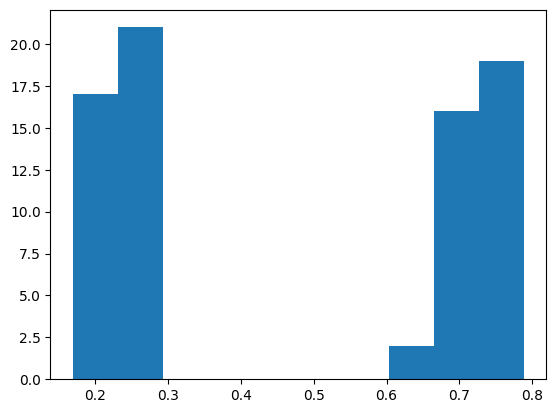

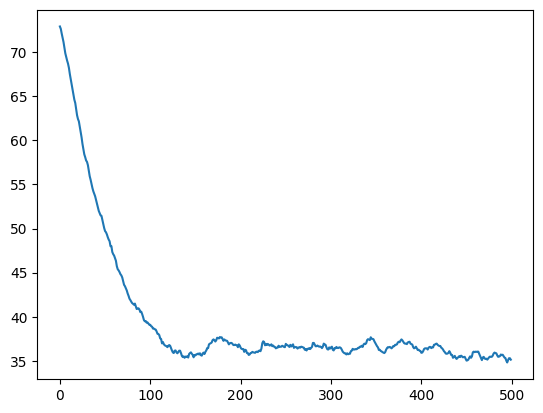

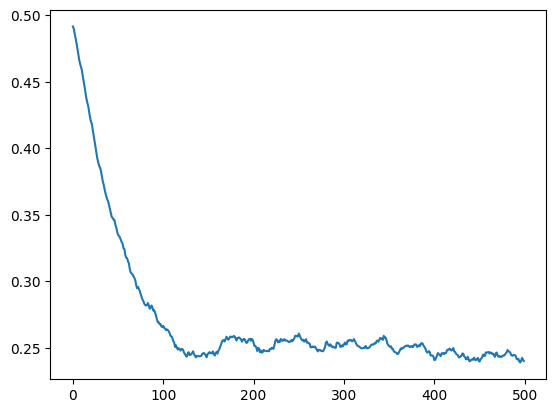

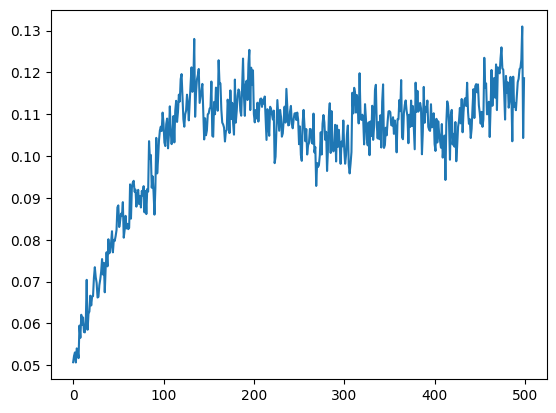

0.1 0 1 0
Progress: 99.80%

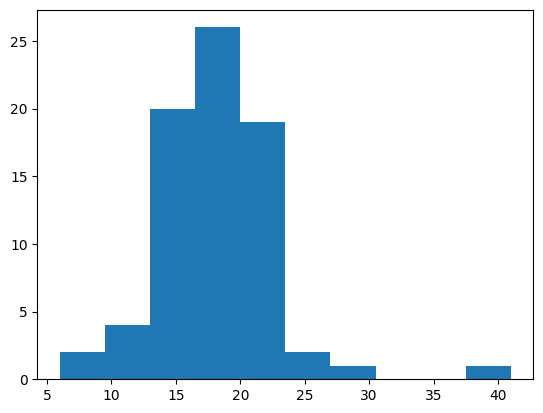

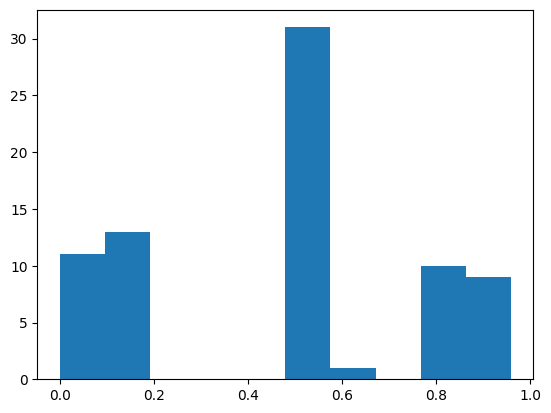

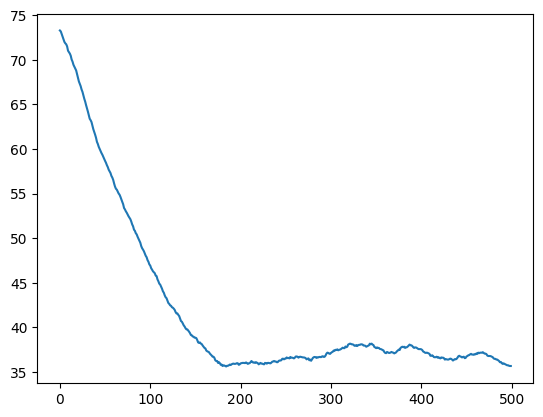

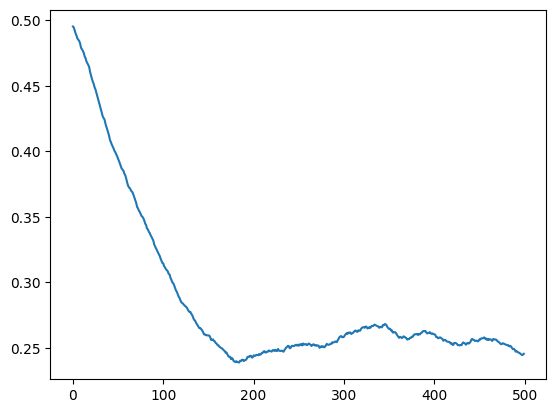

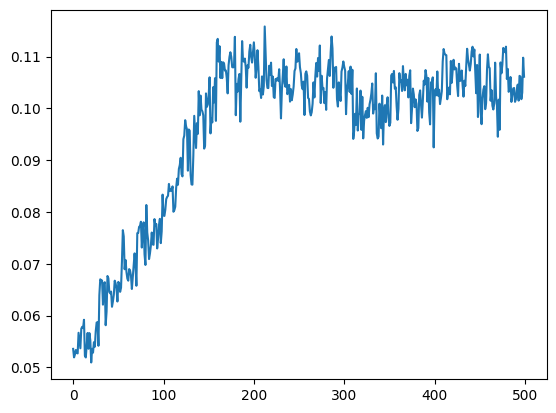

0.1 0.25 0 0.75
Progress: 99.80%

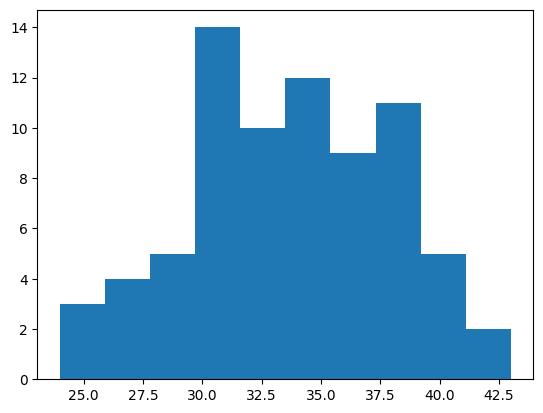

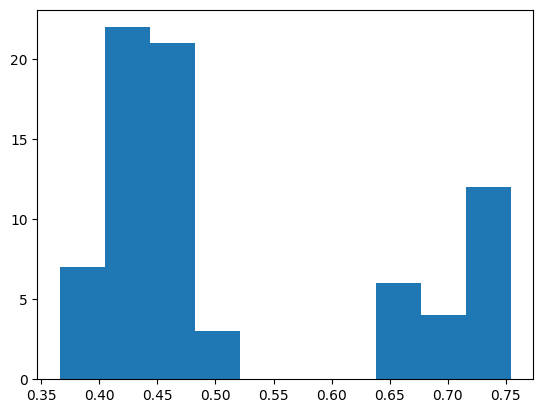

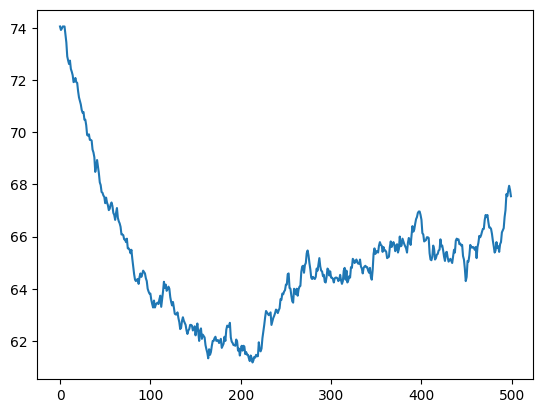

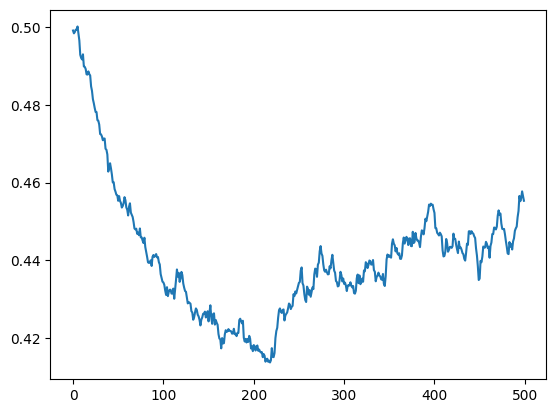

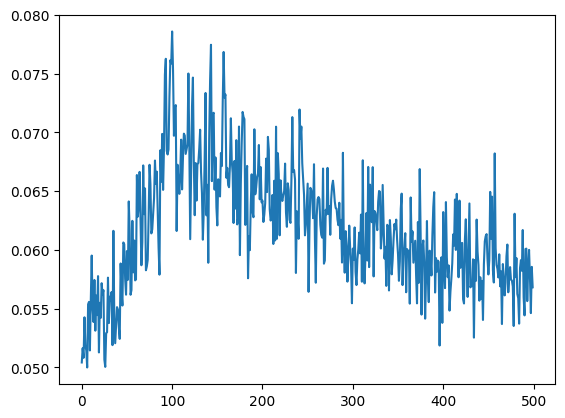

0.1 0.25 0.25 0.5
Progress: 99.80%

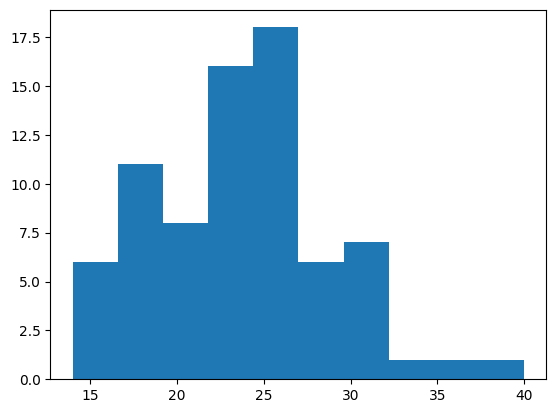

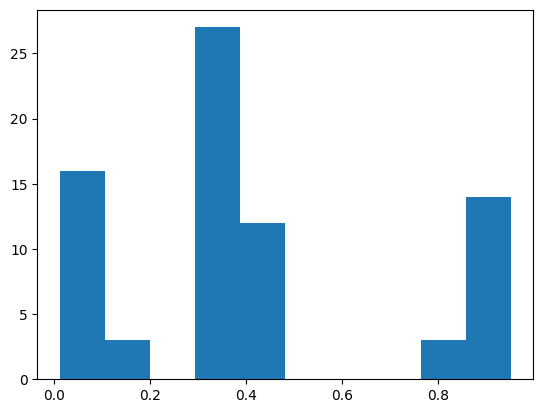

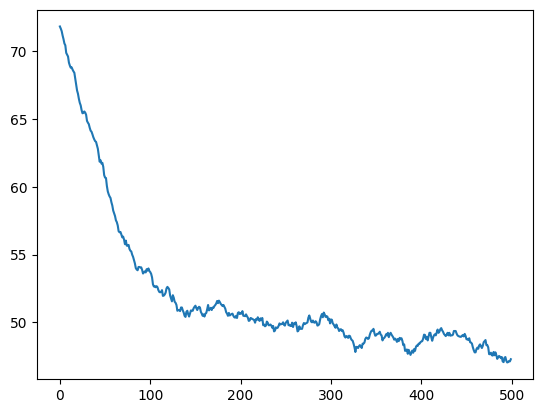

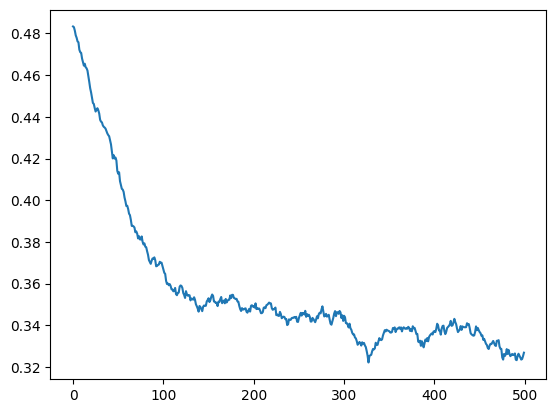

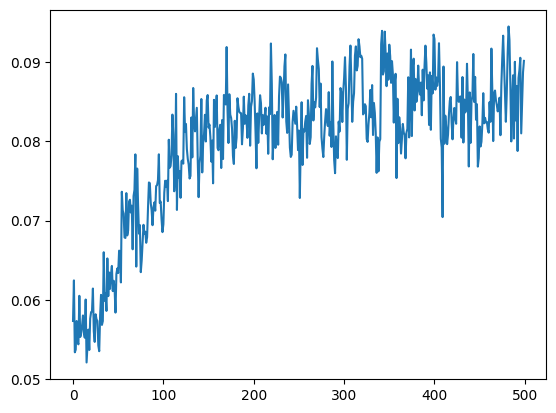

0.1 0.25 0.5 0.25
Progress: 99.80%

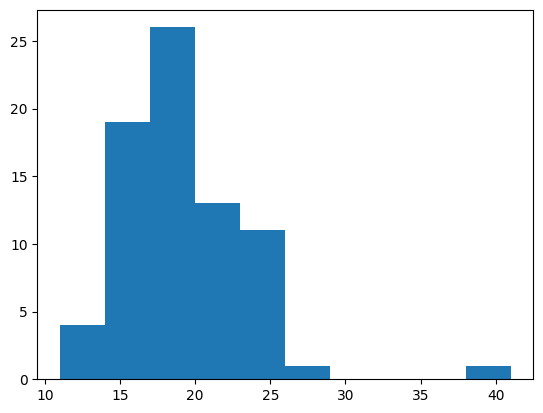

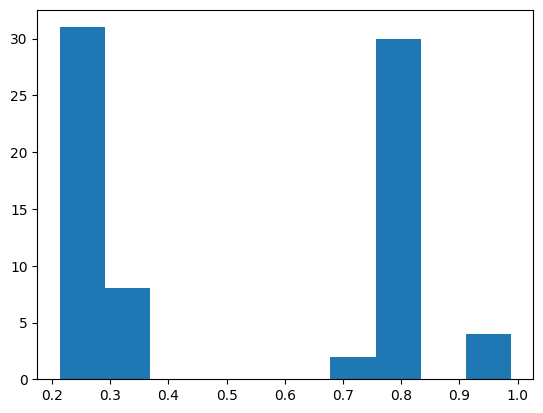

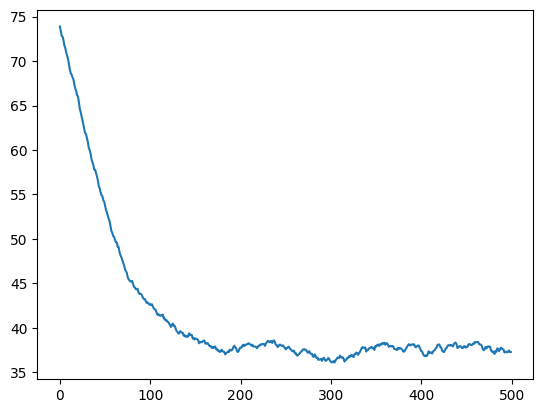

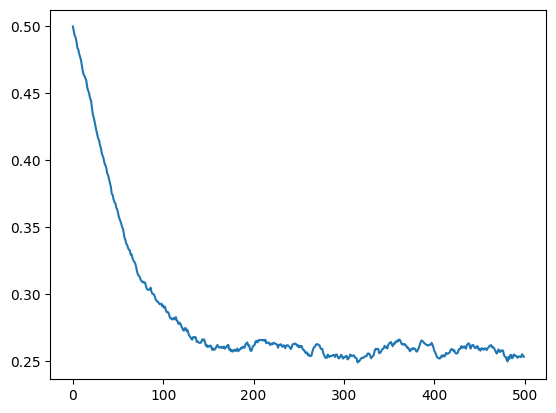

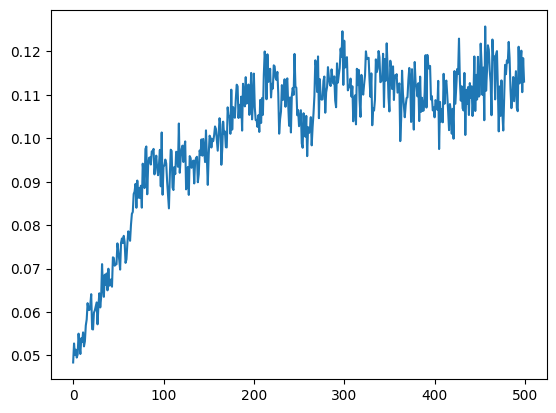

0.1 0.25 0.75 0
Progress: 99.80%

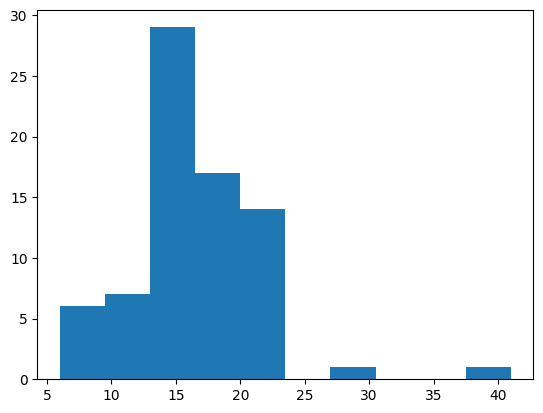

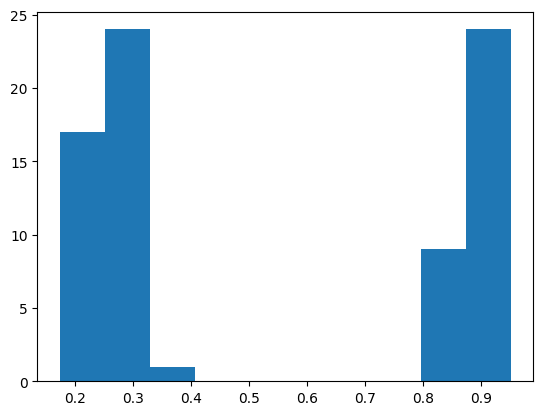

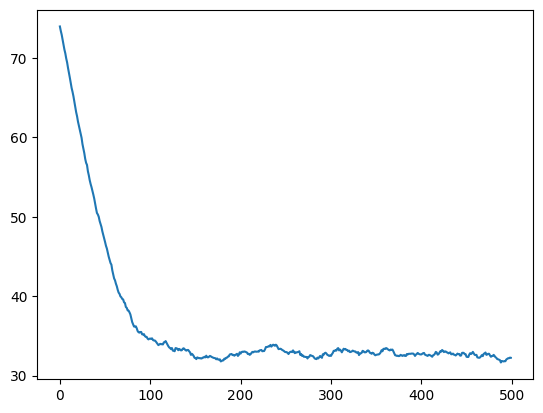

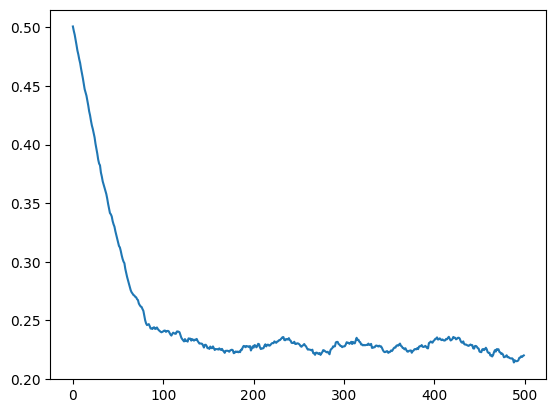

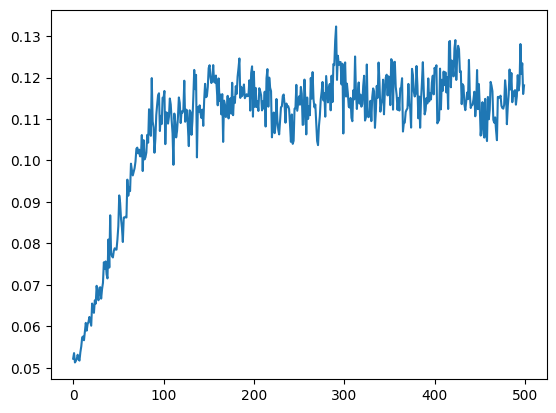

0.1 0.5 0 0.5
Progress: 99.80%

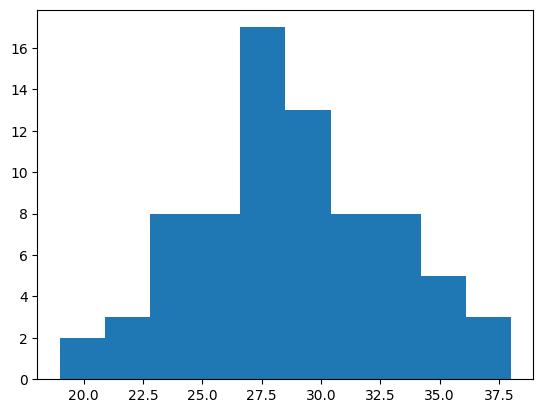

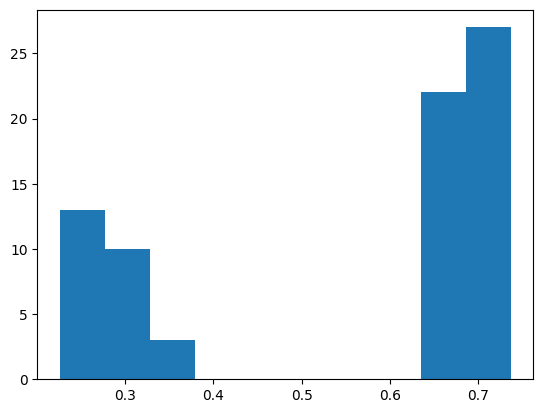

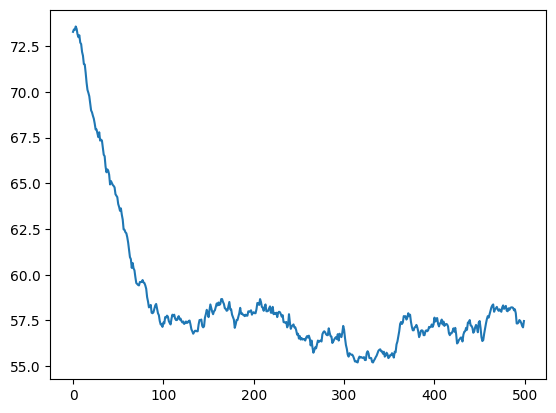

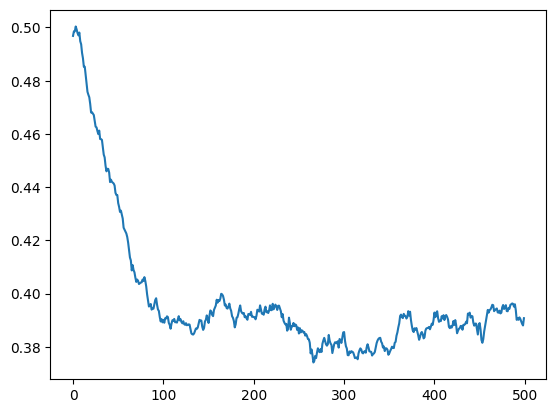

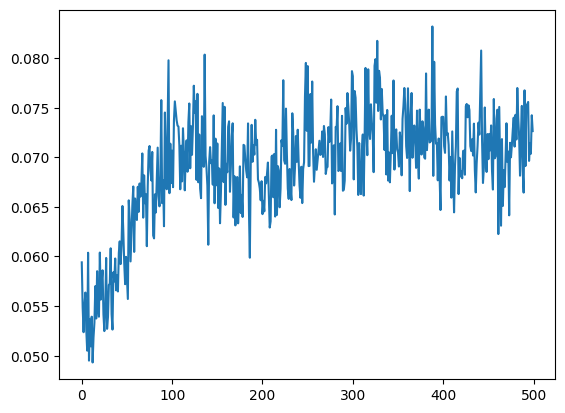

0.1 0.5 0.25 0.25
Progress: 75.40%

KeyboardInterrupt: 

In [15]:
n_agents = 75
prob = 0.5
mu = 0.3
temp = 0.1
max_steps = 500
combs = [0,0.25,0.5,0.75,1]

for sociability in [0.1]:
    for w_pop in combs:
        for w_prox in combs:
            for w_sim in combs:
                if w_prox + w_pop + w_sim == 1:
                

                    print(sociability, w_pop,w_prox,w_sim)
                    model = SocialNetwork(n_agents, prob, w_pop, w_prox, w_sim, sociability)
                    count = 1
                    for i in range(max_steps):
                        # Run the model with the current set of parameters
                        #print(model.Data_Collector["IN degree"])
                        model.step()
                        print(f"\rProgress: {(i / max_steps) * 100:.2f}%", end='', flush=True)

                    

                        count += 1
    
                    results = pd.DataFrame(model.Data_Collector)
                    degree_seq = results["IN degree"].iloc[-1]
                    
                    plt.figure()
                    plt.hist(degree_seq)
                    plt.show()
                    plt.figure()
                    plt.hist(list(model.OPINIONS.values()))
                    plt.show()
                    plt.figure()
                    plt.plot(results["avg degrees"])
                    plt.show()
                    plt.figure()
                    plt.plot(results["avg clustering coeff"])
                    plt.show()
                    plt.figure()
                    plt.plot(results["modularity"])
                    plt.show()
    